# Grocery Item Classification CNN
This notebook trains a Convolutional Neural Network (CNN) to classify grocery items into **4 classes** across **2 categories** (fruits & vegetables).

We will use images scraped from Wikimedia Commons (apple, banana, carrot, tomato).

## Steps:
1. Load dataset
2. Filter invalid images
3. Normalize images
4. Define CNN
5. Compile & train
6. Save model
7. Test with new images


In [19]:
# TensorFlow / Keras imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Rescaling
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.callbacks import EarlyStopping


# Other useful imports
import numpy as np
import matplotlib.pyplot as plt
import os


# dtaset path
DATA_DIR = r"C:\coding5final\coding5\data\images\fruit&veg"

# hyperparameters!
BATCH_SIZE = 32
IMAGE_SIZE = (128, 128)
SEED = 42
VALIDATION_SPLIT = 0.2

# loading training dataset
train_dataset = image_dataset_from_directory(
    DATA_DIR,
    labels="inferred",
    label_mode="categorical",
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    validation_split=VALIDATION_SPLIT,
    subset="training",
    seed=SEED
)

# loading validation dataset
validation_dataset = image_dataset_from_directory(
    DATA_DIR,
    labels="inferred",
    label_mode="categorical",
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    validation_split=VALIDATION_SPLIT,
    subset="validation",
    seed=SEED
)

class_names = train_dataset.class_names
print(f"Detected classes: {class_names}")



Found 200 files belonging to 2 classes.
Using 160 files for training.
Found 200 files belonging to 2 classes.
Using 40 files for validation.
Detected classes: ['fruit', 'veg']


## Filter out invalid images.

In [20]:
from PIL import Image

def filter_corrupted_images(data_dir):
    total_skipped = 0
    for subdir, _, files in os.walk(data_dir):
        for file in files:
            file_path = os.path.join(subdir, file)
            try:
                img = Image.open(file_path)
                img.verify()  # verify that it’s a readable image
            except (IOError, SyntaxError) as e:
                total_skipped += 1
                os.remove(file_path)
                print(f"Deleted corrupted image: {file_path}")
    print(f"Total corrupted images removed: {total_skipped}")

filter_corrupted_images(DATA_DIR)


Total corrupted images removed: 0


## Normalize images

In [21]:
from tensorflow.keras.layers import Rescaling

# normalize images
normalization_layer = Rescaling(1./255)

train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
validation_dataset = validation_dataset.map(lambda x, y: (normalization_layer(x), y))


## Define CNN model

In [24]:
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Input(shape=(*IMAGE_SIZE, 3)),  # Proper Input layer
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])


## Compile & Train Model


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 223ms/step - accuracy: 0.8125 - loss: 0.4747 - val_accuracy: 0.6750 - val_loss: 0.4868
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step - accuracy: 0.8438 - loss: 0.4309 - val_accuracy: 0.7250 - val_loss: 0.5780
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - accuracy: 0.8500 - loss: 0.3222 - val_accuracy: 0.8250 - val_loss: 0.4459
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - accuracy: 0.9125 - loss: 0.2480 - val_accuracy: 0.7750 - val_loss: 0.4482
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 195ms/step - accuracy: 0.8938 - loss: 0.2244 - val_accuracy: 0.7750 - val_loss: 0.4724
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step - accuracy: 0.9375 - loss: 0.1598 - val_accuracy: 0.7250 - val_loss: 0.6759
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step - accuracy: 0.9500 - loss: 0.1505 - val_accuracy: 0.7250 - val_loss: 0.5631
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - accuracy: 0.9500 - loss: 0.1403 - val_accuracy: 0.7000 - val_loss:

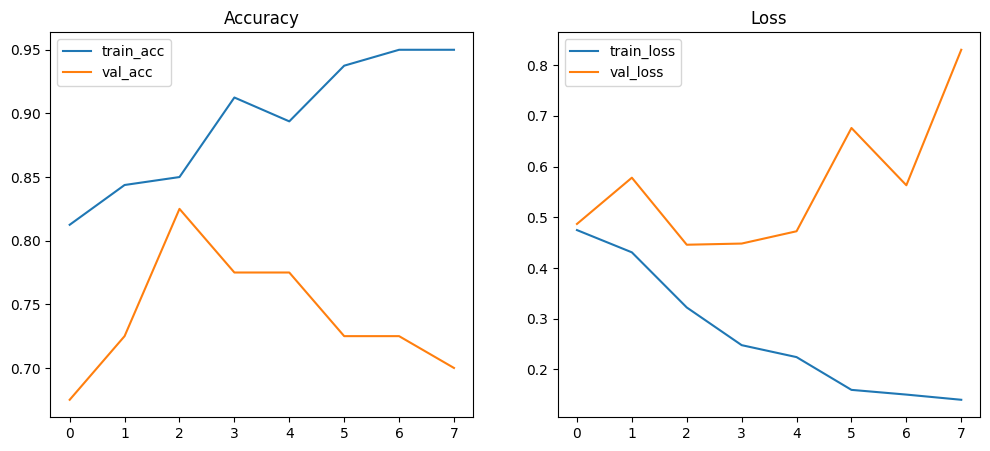

In [26]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# train Model with Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=30,
    callbacks=[early_stop]
)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title("Loss")
plt.legend()
plt.show()

In [28]:
# save model in Keras format
MODEL_PATH = r"C:\coding5final\coding5\models\fruit_veg_cnn.keras"
os.makedirs(os.path.dirname(MODEL_PATH), exist_ok=True)
model.save(MODEL_PATH)
print(f"Model saved to {MODEL_PATH}")


Model saved to C:\coding5final\coding5\models\fruit_veg_cnn.keras


## Unseen image test

In [30]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(model, img_path, class_names):
    img = image.load_img(img_path, target_size=IMAGE_SIZE)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction)
    print(f"Predicted Class: {class_names[class_idx]} with confidence {prediction[0][class_idx]:.2f}")

# example usage
predict_image(model, r"C:\coding5final\coding5\data\outsidedata\banana-7h4m9.webp", class_names)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Predicted Class: fruit with confidence 0.60


## Evaluation
In the first iteration, the model was only able to predict whether an image contained a fruit or a vegetable, rather than identifying the specific item (e.g. apple, banana, carrot, tomato).

This was caused by how the dataset was loaded, not by the CNN architecture itself.

The dataset followed this structure:

fruit&veg/
├── fruit/
│   ├── apples/
│   └── bananas/
└── veg/
    ├── carrots/
    └── tomatoes/


When the dataset was loaded from the top-level fruit&veg directory, TensorFlow inferred class labels from the first directory level only. This resulted in two training labels: fruit and veg. Subdirectories representing individual items were not treated as separate classes.

As a result, the model was trained to perform binary classification at the category level and never learned item-level distinctions. The model’s behaviour therefore accurately reflected the labels it was given during training.

This limitation was addressed in later iterations by changing how the dataset was loaded so that item-level folders were used as class labels, without modifying the underlying file structure.

## Improved version with 2 step classifier

## Train Item-Level Models (Apples vs Bananas / Carrots vs Tomatoes)

In [35]:
import os
import numpy as np
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import (
    Input, Conv2D, MaxPooling2D,
    Dense, Dropout, Flatten
)
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Rescaling
from tensorflow.keras.utils import image_dataset_from_directory



In [36]:
DATA_DIR = r"C:\coding5final\coding5\data\images\fruit&veg"
MODEL_DIR = r"C:\coding5final\coding5\models"

IMAGE_SIZE = (224, 224)
BATCH_SIZE = 16
EPOCHS = 30


In [37]:
normalization = Rescaling(1./255)


In [38]:
category_ds = image_dataset_from_directory(
    DATA_DIR,
    labels="inferred",
    label_mode="int",
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    validation_split=0.2,
    subset="training",
    seed=42
)

category_val_ds = image_dataset_from_directory(
    DATA_DIR,
    labels="inferred",
    label_mode="int",
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    validation_split=0.2,
    subset="validation",
    seed=42
)

category_class_names = category_ds.class_names


Found 200 files belonging to 2 classes.
Using 160 files for training.
Found 200 files belonging to 2 classes.
Using 40 files for validation.


In [39]:
category_ds = category_ds.map(lambda x, y: (normalization(x), y))
category_val_ds = category_val_ds.map(lambda x, y: (normalization(x), y))


In [40]:
fruit_path = os.path.join(DATA_DIR, "fruit")

fruit_ds = image_dataset_from_directory(
    fruit_path,
    label_mode="categorical",
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    subset="training",
    seed=42
)

fruit_val_ds = image_dataset_from_directory(
    fruit_path,
    label_mode="categorical",
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    subset="validation",
    seed=42
)

fruit_class_names = fruit_ds.class_names


Found 100 files belonging to 3 classes.
Using 80 files for training.
Found 100 files belonging to 3 classes.
Using 20 files for validation.


In [41]:
fruit_ds = fruit_ds.map(lambda x, y: (normalization(x), y))
fruit_val_ds = fruit_val_ds.map(lambda x, y: (normalization(x), y))


In [42]:
veg_path = os.path.join(DATA_DIR, "veg")

veg_ds = image_dataset_from_directory(
    veg_path,
    label_mode="categorical",
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    subset="training",
    seed=42
)

veg_val_ds = image_dataset_from_directory(
    veg_path,
    label_mode="categorical",
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    subset="validation",
    seed=42
)

veg_class_names = veg_ds.class_names


Found 100 files belonging to 3 classes.
Using 80 files for training.
Found 100 files belonging to 3 classes.
Using 20 files for validation.


In [43]:
veg_ds = veg_ds.map(lambda x, y: (normalization(x), y))
veg_val_ds = veg_val_ds.map(lambda x, y: (normalization(x), y))


In [44]:
def build_model(num_classes):
    return Sequential([
        Input(shape=(*IMAGE_SIZE, 3)),

        Conv2D(32, (3,3), activation="relu"),
        MaxPooling2D(2,2),

        Conv2D(64, (3,3), activation="relu"),
        MaxPooling2D(2,2),

        Conv2D(128, (3,3), activation="relu"),
        MaxPooling2D(2,2),

        Flatten(),
        Dense(128, activation="relu"),
        Dropout(0.5),

        Dense(num_classes, activation="softmax")
    ])


In [45]:
category_model = build_model(num_classes=2)

category_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [46]:
category_model.fit(
    category_ds,
    validation_data=category_val_ds,
    epochs=EPOCHS,
    callbacks=[EarlyStopping(patience=5, restore_best_weights=True)]
)


Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - accuracy: 0.5625 - loss: 1.0096 - val_accuracy: 0.5750 - val_loss: 0.6580
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - accuracy: 0.6875 - loss: 0.5817 - val_accuracy: 0.6750 - val_loss: 0.6215
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - accuracy: 0.7437 - loss: 0.5358 - val_accuracy: 0.7750 - val_loss: 0.5090
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - accuracy: 0.7625 - loss: 0.4747 - val_accuracy: 0.7250 - val_loss: 0.5147
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - accuracy: 0.8313 - loss: 0.4352 - val_accuracy: 0.8250 - val_loss: 0.4386
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - accuracy: 0.8250 - loss: 0.3804 - val_accuracy: 0.7000 - val_loss: 0.4970
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - accuracy: 0.8375 - loss: 0.3237 - val_accuracy: 0.8000 - val_loss: 0.5085
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - accuracy: 0.8687 - loss: 0.2700 - val_accuracy: 0.

In [47]:
fruit_model = build_model(num_classes=len(fruit_class_names))

fruit_model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [48]:
fruit_model.fit(
    fruit_ds,
    validation_data=fruit_val_ds,
    epochs=EPOCHS,
    callbacks=[EarlyStopping(patience=5, restore_best_weights=True)]
)


Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 182ms/step - accuracy: 0.4500 - loss: 2.8594 - val_accuracy: 0.4000 - val_loss: 1.2031
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - accuracy: 0.5125 - loss: 0.7763 - val_accuracy: 0.6000 - val_loss: 0.8047
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - accuracy: 0.6375 - loss: 0.6345 - val_accuracy: 0.8000 - val_loss: 0.4851
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - accuracy: 0.7750 - loss: 0.4778 - val_accuracy: 0.7000 - val_loss: 0.5369
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - accuracy: 0.8375 - loss: 0.3629 - val_accuracy: 0.6500 - val_loss: 0.5987
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - accuracy: 0.8375 - loss: 0.4804 - val_accuracy: 0.7000 - val_loss: 0.5707
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - accuracy: 0.7625 - loss: 0.5883 - val_accuracy: 0.6000 - val_loss: 0.6036
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - accuracy: 0.7750 - loss: 0.4781 - val_accuracy: 0.4000 - val_loss:

In [49]:
veg_model = build_model(num_classes=len(veg_class_names))

veg_model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [50]:
veg_model.fit(
    veg_ds,
    validation_data=veg_val_ds,
    epochs=EPOCHS,
    callbacks=[EarlyStopping(patience=5, restore_best_weights=True)]
)


Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 187ms/step - accuracy: 0.3500 - loss: 1.2709 - val_accuracy: 0.6000 - val_loss: 0.7763
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - accuracy: 0.5500 - loss: 0.7132 - val_accuracy: 0.4000 - val_loss: 0.8596
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - accuracy: 0.6000 - loss: 0.6430 - val_accuracy: 0.7500 - val_loss: 0.6204
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - accuracy: 0.6125 - loss: 0.6101 - val_accuracy: 0.6000 - val_loss: 0.5827
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 0.7250 - loss: 0.5503 - val_accuracy: 0.6000 - val_loss: 0.5936
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - accuracy: 0.7375 - loss: 0.4743 - val_accuracy: 0.7500 - val_loss: 0.4207
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - accuracy: 0.8750 - loss: 0.3356 - val_accuracy: 0.6500 - val_loss: 0.5685
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - accuracy: 0.8375 - loss: 0.3169 - val_accuracy: 0.8500 - val_loss:

In [51]:
os.makedirs(MODEL_DIR, exist_ok=True)

category_model.save(os.path.join(MODEL_DIR, "category_model.keras"))
fruit_model.save(os.path.join(MODEL_DIR, "fruit_model.keras"))
veg_model.save(os.path.join(MODEL_DIR, "veg_model.keras"))


In [52]:
def predict_image(image_path):
    img = tf.keras.utils.load_img(image_path, target_size=IMAGE_SIZE)
    img = tf.keras.utils.img_to_array(img) / 255.0
    img = np.expand_dims(img, axis=0)

    # Step 1: category
    cat_pred = category_model.predict(img)
    cat_idx = np.argmax(cat_pred)
    category = category_class_names[cat_idx]

    # Step 2: item
    if category == "fruit":
        item_pred = fruit_model.predict(img)
        item = fruit_class_names[np.argmax(item_pred)]
    else:
        item_pred = veg_model.predict(img)
        item = veg_class_names[np.argmax(item_pred)]

    return category, item


In [53]:
predict_image(r"C:\coding5final\coding5\data\outsidedata\banana-7h4m9.webp")




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


('veg', 'carrots')

### End of task evaluation 

First Iteration:
The initial convolutional neural network (CNN) successfully distinguished between the broad categories of fruit and vegetable. However, it failed to discriminate between specific subclasses (e.g., apples vs. bananas). This is a typical limitation of single-level classifiers when applied to hierarchical or fine-grained categories, as the network learns coarse features but lacks sufficient representation for subclass-level variance. 
   
For discussion on hierarchical vs flat classifiers in computer vision, see Krizhevsky, A., Sutskever, I., & Hinton, G. E. (2012). ImageNet classification with deep convolutional neural networks. Communications of the ACM, 60(6), 84-90. Available at: https://www.cs.toronto.edu/~kriz/imagenet_classification_with_deep_convolutional.pdf
 and Silla, C. N., & Freitas, A. A. (2011). A survey of hierarchical classification across different application domains. Data Mining and Knowledge Discovery, 22, 31–72. Available at: https://www.sciencedirect.com/science/article/pii/S0950705110002360


Two-Step Classifier:
The two-step hierarchical approach attempts to first classify category (fruit vs vegetable) and then subclass. While theoretically promising, error propagation from the first stage significantly impacted the second stage, leading to misclassifications such as bananas being identified as carrots. Additional contributing factors include subclass imbalance and limited intra-class diversity. 
    Hierarchical classification strategies are discussed further in Deng, J., Dong, W., Socher, R., Li, L. J., Li, K., & Fei-Fei, L. (2011). ImageNet: A large-scale hierarchical image database. In 2011 IEEE Conference on Computer Vision and Pattern Recognition (CVPR), 248–255. Available at: https://www.cv-foundation.org/openaccess/content_cvpr_2011/papers/Deng_ImageNet_Large-Scale_Recognition_2011_CVPR_paper.pdf


Potential Improvements:
    To enhance model performance, a unified multiclass classifier directly predicting all subclasses is recommended, as it allows the model to learn discriminative features across the full label space. Complementary techniques include:

    Data augmentation to increase intra-class variability. See Shorten, C., & Khoshgoftaar, T. M. (2019). A survey on image data augmentation for deep learning. Journal of Big Data, 6(60). Available at: https://arxiv.org/abs/1904.09526

    Transfer learning using pretrained CNNs (e.g., ResNet, EfficientNet) for better generalisation. See He, K., Zhang, X., Ren, S., & Sun, J. (2016). Deep residual learning for image recognition. In Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition (CVPR), 770–778. Available at: https://arxiv.org/abs/1512.03385

    Class balancing through oversampling or weighted loss functions to mitigate bias toward majority subclasses.

Overall, moving from hierarchical two-step models to a more robust multiclass architecture with complex data is expected to reduce misclassifications and improve both category-level and subclass-level accuracy.